In [45]:
#-------Import Dependencies-------#
%matplotlib inline
import pandas as pd
import os,shutil,math,scipy,cv2
import numpy as np
import matplotlib.pyplot as plt
import random as rn


from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,roc_curve,auc

from PIL import Image
from PIL import Image as pil_image
from PIL import ImageDraw

from time import time
from glob import glob
from tqdm import tqdm
from skimage.io import imread
from IPython.display import SVG

from scipy import misc,ndimage
from scipy.ndimage.interpolation import zoom
from scipy.ndimage import imread


from keras import backend as K
from keras.utils.np_utils import to_categorical
from keras import layers
from keras.preprocessing.image import save_img
from keras.utils.vis_utils import model_to_dot
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.applications.xception import Xception
from keras.applications.nasnet import NASNetMobile
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Flatten,Dropout,Concatenate,GlobalAveragePooling2D,Lambda,ZeroPadding2D
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,SGD
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler

In [46]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["acc"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_acc"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [47]:
def label_assignment(img,label):
    return label

def training_data(label,data_dir):
    for img in tqdm(os.listdir(data_dir)):
        label = label_assignment(img,label)
        path = os.path.join(data_dir,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(imgsize,imgsize))
        
        X.append(np.array(img))
        Z.append(str(label))

In [48]:
beans = '../input/repository/abhinavsagar-grocery-709de02/BEANS'
cake = '../input/repository/abhinavsagar-grocery-709de02/CAKE'
candy = '../input/repository/abhinavsagar-grocery-709de02/CANDY'
cereal = '../input/repository/abhinavsagar-grocery-709de02/CEREAL'
chips = '../input/repository/abhinavsagar-grocery-709de02/CHIPS'
chocolate = '../input/repository/abhinavsagar-grocery-709de02/CHOCOLATE'
coffee = '../input/repository/abhinavsagar-grocery-709de02/COFFEE'
corn = '../input/repository/abhinavsagar-grocery-709de02/CORN'
fish = '../input/repository/abhinavsagar-grocery-709de02/FISH'
flour = '../input/repository/abhinavsagar-grocery-709de02/FLOUR'
honey = '../input/repository/abhinavsagar-grocery-709de02/HONEY'
jam = '../input/repository/abhinavsagar-grocery-709de02/JAM'
juice = '../input/repository/abhinavsagar-grocery-709de02/JUICE'
milk = '../input/repository/abhinavsagar-grocery-709de02/MILK'
nuts = '../input/repository/abhinavsagar-grocery-709de02/NUTS'
oil = '../input/repository/abhinavsagar-grocery-709de02/OIL'
pasta = '../input/repository/abhinavsagar-grocery-709de02/PASTA'
rice = '../input/repository/abhinavsagar-grocery-709de02/RICE'
soda = '../input/repository/abhinavsagar-grocery-709de02/SODA'
spices = '../input/repository/abhinavsagar-grocery-709de02/SPICES'
sugar = '../input/repository/abhinavsagar-grocery-709de02/SUGAR'
tea = '../input/repository/abhinavsagar-grocery-709de02/TEA'
tomato_sauce = '../input/repository/abhinavsagar-grocery-709de02/TOMATO_SAUCE'
vinegar = '../input/repository/abhinavsagar-grocery-709de02/VINEGAR'
water = '../input/repository/abhinavsagar-grocery-709de02/WATER'

X = []
Z = []
imgsize = 150

In [49]:
training_data('chihuahua',beans)
training_data('japanese_spaniel',cake)
training_data('maltese',candy)
training_data('pekinese',cereal)
training_data('shitzu',chips)
training_data('blenheim_spaniel',chocolate)
training_data('papillon',coffee)
training_data('toy_terrier',corn)
training_data('afghan_hound',fish)
training_data('basset',flour)
training_data('chihuahua',honey)
training_data('japanese_spaniel',jam)
training_data('maltese',juice)
training_data('pekinese',milk)
training_data('shitzu',nuts)
training_data('blenheim_spaniel',oil)
training_data('papillon',pasta)
training_data('toy_terrier',rice)
training_data('afghan_hound',soda)
training_data('basset',spices)
training_data('shitzu',sugar)
training_data('blenheim_spaniel',tea)
training_data('papillon',tomato_sauce)
training_data('toy_terrier',vinegar)
training_data('afghan_hound',water)


100%|██████████| 262/262 [00:01<00:00, 258.36it/s]


In [50]:
label_encoder= LabelEncoder()
Y = label_encoder.fit_transform(Z)
Y = to_categorical(Y,10)
X = np.array(X)
X=X/255

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=69)

In [51]:
augs_gen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2, 
        horizontal_flip=True,  
        vertical_flip=False) 

augs_gen.fit(x_train)

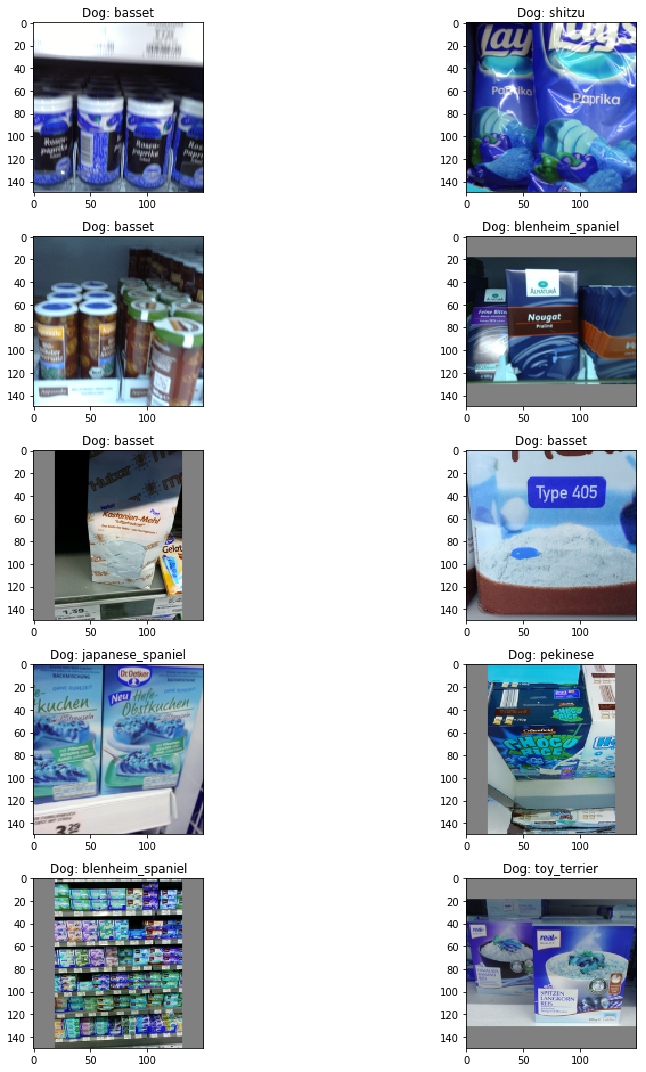

In [52]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Dog: '+Z[l])
        
plt.tight_layout()

In [53]:
base_model = VGG16(include_top=False,
                  input_shape = (imgsize,imgsize,3),
                  weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    
for layer in base_model.layers:
    print(layer,layer.trainable)

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()

SVG(model_to_dot(model).create(prog='dot', format='svg'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

<keras.engine.input_layer.InputLayer object at 0x7f7fb3da8b38> False
<keras.layers.convolutional.Conv2D object at 0x7f7f82fbfa90> False
<keras.layers.convolutional.Conv2D object at 0x7f7f82f7ae48> False
<keras.layers.pooling.MaxPooling2D object at 0x7f7f82f1ae10> False
<keras.layers.convolutional.Conv2D object at 0x7f7f82f1ae48> False
<keras.layers.convolutional.Conv2D object at 0x7f7f82eb90f0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f7f82e56048> False
<keras.layers.convolutional.Conv2D object at 0x7f7f82eb9978> False
<keras.layers.convolutional.Conv2D object at 0x7f7f82e72198> False
<keras.layers.convolutional.Conv2D object at 0x7f7f82e88780> False
<keras.layers.pooling.MaxPooling2D object at 0x7f7f82e23e48> False
<keras.layers.convolutional.Conv2D object at 0x7f7f82e3f470> False
<keras.layers.convolutional.Conv2D object at 0x7f7f82df4240> False
<keras.layers.convolutional.Conv2D object at 0x7f7f82df4ac8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f7f82db2ac8>

In [54]:
checkpoint = ModelCheckpoint(
    './base.model',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min',
    save_weights_only=False,
    period=1
)
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=30,
    verbose=1,
    mode='auto'
)
tensorboard = TensorBoard(
    log_dir = './logs',
    histogram_freq=0,
    batch_size=16,
    write_graph=True,
    write_grads=True,
    write_images=False,
)

csvlogger = CSVLogger(
    filename= "training_csv.log",
    separator = ",",
    append = False
)

reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1, 
    mode='auto'
)

callbacks = [checkpoint,tensorboard,csvlogger,reduce]

In [55]:
#-----------Optimizers-----------#
opt = SGD(lr=1e-4,momentum=0.99)
opt1 = Adam(lr=1e-2)
#----------Compile---------------#
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
#-----------Training------------#
history = model.fit_generator(
    augs_gen.flow(x_train,y_train,batch_size=128),
    validation_data  = (x_test,y_test),
    validation_steps = 100,
    steps_per_epoch  = 100,
    epochs = 100, 
    verbose = 1,
    callbacks=callbacks
)

Epoch 1/100
100/100 [==============================] - 65s 647ms/step - loss: 2.3839 - acc: 0.1501 - val_loss: 2.0677 - val_acc: 0.2976

Epoch 00001: val_loss improved from inf to 2.06770, saving model to ./base.model
Epoch 2/100
100/100 [==============================] - 60s 601ms/step - loss: 2.0992 - acc: 0.2479 - val_loss: 1.9367 - val_acc: 0.3636

Epoch 00002: val_loss improved from 2.06770 to 1.93671, saving model to ./base.model
Epoch 3/100
100/100 [==============================] - 61s 612ms/step - loss: 1.9917 - acc: 0.3015 - val_loss: 1.8665 - val_acc: 0.3865

Epoch 00003: val_loss improved from 1.93671 to 1.86647, saving model to ./base.model
Epoch 4/100
100/100 [==============================] - 61s 609ms/step - loss: 1.9218 - acc: 0.3268 - val_loss: 1.8171 - val_acc: 0.3953

Epoch 00004: val_loss improved from 1.86647 to 1.81708, saving model to ./base.model
Epoch 5/100
100/100 [==============================] - 62s 615ms/step - loss: 1.8912 - acc: 0.3473 - val_loss: 1.772

100/100 [==============================] - 61s 609ms/step - loss: 1.6353 - acc: 0.4365 - val_loss: 1.5023 - val_acc: 0.5178

Epoch 00039: val_loss did not improve from 1.50027
Epoch 40/100
100/100 [==============================] - 62s 623ms/step - loss: 1.6392 - acc: 0.4375 - val_loss: 1.5013 - val_acc: 0.5185

Epoch 00040: val_loss did not improve from 1.50027
Epoch 41/100
100/100 [==============================] - 61s 614ms/step - loss: 1.6332 - acc: 0.4373 - val_loss: 1.5006 - val_acc: 0.5239

Epoch 00041: val_loss did not improve from 1.50027

Epoch 00041: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 42/100
100/100 [==============================] - 62s 621ms/step - loss: 1.6201 - acc: 0.4390 - val_loss: 1.4962 - val_acc: 0.5138

Epoch 00042: val_loss improved from 1.50027 to 1.49616, saving model to ./base.model
Epoch 43/100
100/100 [==============================] - 61s 609ms/step - loss: 1.6274 - acc: 0.4450 - val_loss: 1.4960 - val_acc: 0.5138

Epo

KeyboardInterrupt: 

In [ ]:
show_final_history(history)
model.load_weights('./base.model')
model_score = model.evaluate(x_test,y_test)
print("Model Test Loss:",model_score[0])
print("Model Test Accuracy:",model_score[1])

model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
    
model.save("model.h5")
print("Weights Saved")

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
LOG_DIR = './logs' # Here you have to put your log directory
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 8080 &'
    .format(LOG_DIR)
)
get_ipython().system_raw('./ngrok http 8080 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"